General set up



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


import warnings

warnings.filterwarnings("ignore")

In [2]:
from google.colab import files

uploaded = files.upload()


Saving forecasting.csv to forecasting.csv


In [3]:
uploaded.keys()

dict_keys(['forecasting.csv'])

In [65]:
df = pd.read_csv('forecasting.csv')
df.head()

,product_id,hosting,sale_date,revenue
0,Product 1,Cloud,2023-11-01,53583.85
1,Product 5,Cloud,2023-09-01,213436.30
2,Product 5,Cloud,2023-08-01,80083.97
3,Product 5,Data Center,2023-07-01,367722.25
4,Product 5,Cloud,2023-01-01,58483.99


Setting up the training data

In [66]:
# Convert sale_date to datetime type
df['sale_date'] = pd.to_datetime(df['sale_date'])
df= df[df['sale_date'] <= '2023-10-31']
#df['log_revenue'] = np.log1p(df['revenue'])

# Extract features from the date
df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month

# Define features and target
features = ['year', 'month']
target = 'revenue'
#'log_revenue'


# Train the model on data from 2018 to 2022
train_data = df[(df['year'] >= 2018) & (df['year'] <= 2022)]

Linear regression predictions

1. Linear regression without one-hot encoding

Mean Absolute % Error for 2023: 54.59614723703684


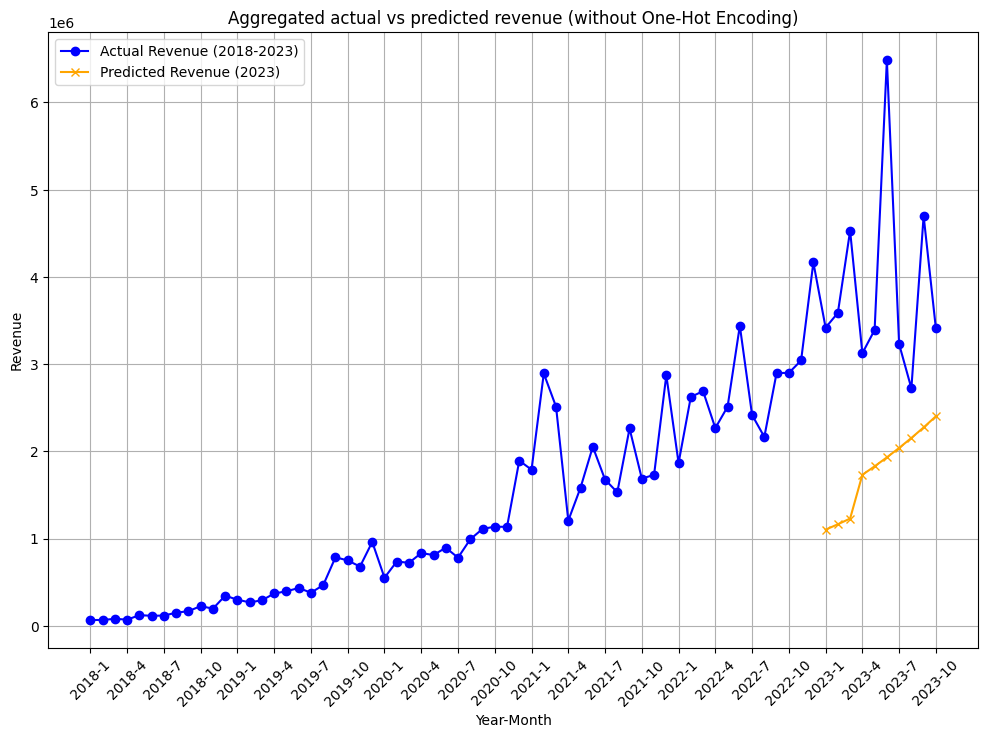

In [ ]:
model = Pipeline([
    ('regressor', LinearRegression())
])

model.fit(train_data[features], train_data[target])

# Make predictions for 2023
df_2023 = df[df['year'] == 2023]
df_2023['predicted_revenue'] = np.expm1(model.predict(df_2023[features]))



# Display predictions, actuals, and differences for 2023
predictions_actuals_diff_2023 = pd.DataFrame({
    'Date': df_2023['sale_date'],
    'Actual Revenue': df_2023['revenue'],
    'Predicted Revenue': df_2023['predicted_revenue'],
    'Difference': df_2023['revenue'] - df_2023['predicted_revenue']
})


# Evaluate the model on 2023 data
#mae_2023 = mean_absolute_error(df_2023[target], df_2023['predicted_revenue'])
#print(f'Mean Absolute Error for 2023: {mae_2023}')
#mse_2023 = mean_squared_error(df_2023[target], df_2023['predicted_revenue'])
#print(f'Mean Squared Error for 2023: {mse_2023}')
mape_2023 = mean_absolute_percentage_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Absolute % Error for 2023: {mape_2023}')

# Aggregate actual and predicted revenue on a monthly basis for plotting
monthly_agg_actual = df.groupby(['year', 'month'])[['revenue']].sum().reset_index()
monthly_agg_predicted = df_2023.groupby(['year', 'month'])[['predicted_revenue']].sum().reset_index()

# Plot the aggregated monthly actual and predicted revenue for 2023
plt.figure(figsize=(12, 8))
plt.plot(monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['year'].astype(str) + '-' + monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['month'].astype(str), monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['revenue'], label='Actual Revenue (2018-2023)', linestyle='-', color='blue')
plt.plot(monthly_agg_predicted['year'].astype(str) + '-' + monthly_agg_predicted['month'].astype(str), monthly_agg_predicted['predicted_revenue'], label='Predicted Revenue (2023)', linestyle='-', color='orange')
ticks = monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['year'].astype(str) + '-' + monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['month'].astype(str)
plt.xticks(ticks[::3])
plt.title('Aggregated actual vs predicted revenue (without One-Hot Encoding)')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Linear Regression with one-hot encoding

In [67]:
# One-hot encoding for the 'month' feature
preprocessor = ColumnTransformer(
    transformers=[('month', OneHotEncoder(), ['month'])],
    remainder='passthrough'
)

# Model training using a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

1.Using all the columns in the dataset

Mean Absolute % Error for 2023: 64.37818742585573


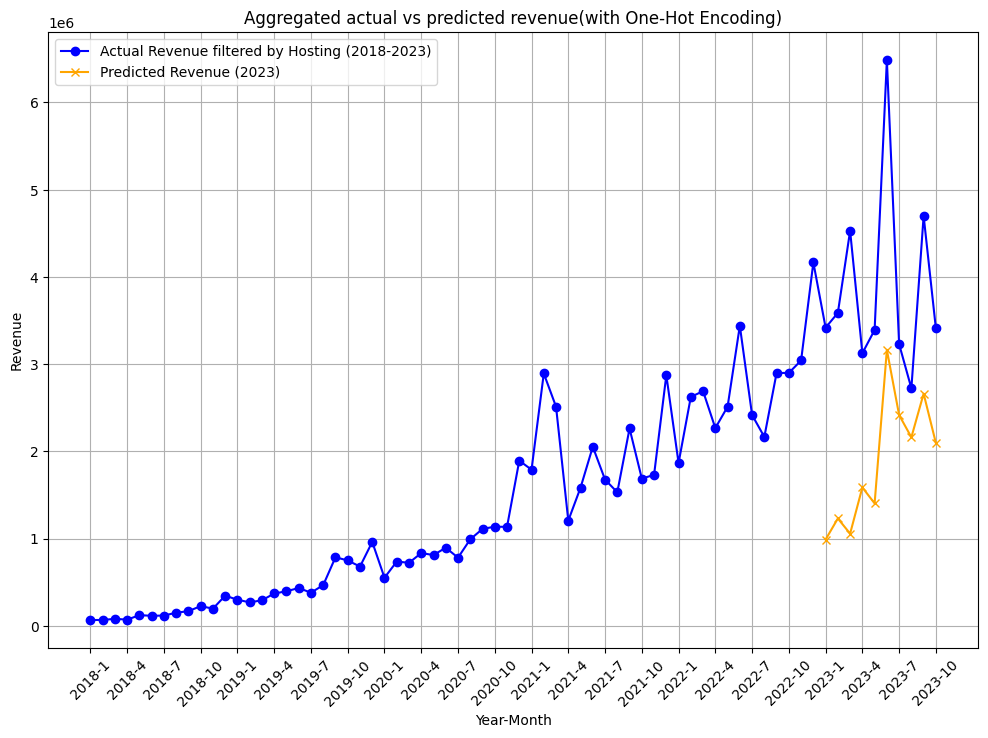

In [7]:


model.fit(train_data[features], train_data[target])

# Make predictions for 2023
df_2023 = df[df['year'] == 2023]
df_2023['predicted_revenue'] = np.expm1(model.predict(df_2023[features]))

# Display predictions, actuals, and differences for 2023
predictions_actuals_diff_2023 = pd.DataFrame({
    'Date': df_2023['sale_date'],
    'Actual Revenue': df_2023['revenue'],
    'Predicted Revenue': df_2023['predicted_revenue'],
    'Difference': df_2023['revenue'] - df_2023['predicted_revenue']
})


# Evaluate the model on 2023 data
#mae_2023 = mean_absolute_error(df_2023[target], df_2023['predicted_revenue'])
#print(f'Mean Absolute Error for 2023: {mae_2023}')
#mse_2023 = mean_squared_error(df_2023[target], df_2023['predicted_revenue'])
#print(f'Mean Squared Error for 2023: {mse_2023}')
mape_2023 = mean_absolute_percentage_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Absolute % Error for 2023: {mape_2023}')

# Aggregate actual and predicted revenue on a monthly basis for plotting
monthly_agg_actual = df.groupby(['year', 'month'])[['revenue']].sum().reset_index()
monthly_agg_predicted = df_2023.groupby(['year', 'month'])[['predicted_revenue']].sum().reset_index()

# Plot the aggregated monthly actual and predicted revenue for 2023
plt.figure(figsize=(12, 8))
plt.plot(monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['year'].astype(str) + '-' + monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['month'].astype(str), monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['revenue'], label='Actual Revenue filtered by Hosting (2018-2023)', marker='o', linestyle='-', color='blue')
plt.plot(monthly_agg_predicted['year'].astype(str) + '-' + monthly_agg_predicted['month'].astype(str), monthly_agg_predicted['predicted_revenue'], label='Predicted Revenue (2023)', marker='x', linestyle='-', color='orange')
ticks = monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['year'].astype(str) + '-' + monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['month'].astype(str)
plt.xticks(ticks[::3])
plt.title('Aggregated actual vs predicted revenue(with One-Hot Encoding)')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

2. Filtering by hosting

Mean Absolute % Error for 2023: 8.86906375431441


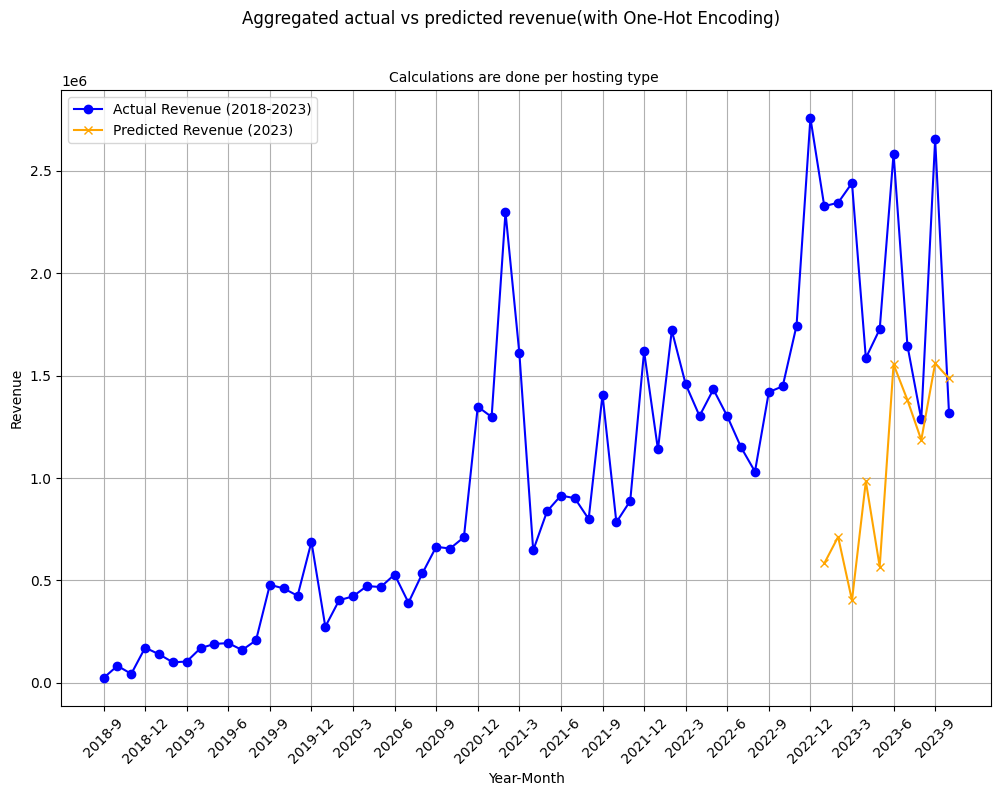

In [8]:
# Filter the data by hosting
filtered_df = df[df['hosting'] == 'Data Center']

# Train the model
train_data_f = filtered_df[(filtered_df['year'] >= 2018) & (filtered_df['year'] <= 2022)]


model.fit(train_data_f[features], train_data_f[target])

# predictions
df_2023 = filtered_df[filtered_df['year'] == 2023]
df_2023['predicted_revenue'] = np.expm1(model.predict(df_2023[features]))

# Create a DataFrame for the predictions
predictions_actuals_diff_2023 = pd.DataFrame({
    'Date': df_2023['sale_date'],
    'Actual Revenue': df_2023['revenue'],
    'Predicted Revenue': df_2023['predicted_revenue'],
    'Difference': df_2023['revenue'] - df_2023['predicted_revenue']
})

mape_2023 = mean_absolute_percentage_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Absolute % Error for 2023: {mape_2023}')

# Aggregate actual and predicted revenue for plotting
monthly_agg_actual = filtered_df.groupby(['year', 'month'])[['revenue']].sum().reset_index()
monthly_agg_predicted = df_2023.groupby(['year', 'month'])[['predicted_revenue']].sum().reset_index()



plt.figure(figsize=(12, 8))
plt.plot(monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['year'].astype(str) + '-' + monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['month'].astype(str), monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['revenue'], label='Actual Revenue (2018-2023)', marker='o', linestyle='-', color='blue')

plt.plot(monthly_agg_predicted['year'].astype(str) + '-' + monthly_agg_predicted['month'].astype(str), monthly_agg_predicted['predicted_revenue'], label='Predicted Revenue (2023)', marker='x', linestyle='-', color='orange')

ticks = monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['year'].astype(str) + '-' + monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['month'].astype(str)
plt.xticks(ticks[::3])

plt.suptitle('Aggregated actual vs predicted revenue(with One-Hot Encoding)')
plt.title('Calculations are done per hosting type ', fontsize=10)
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


3. Filtering data by  hosting and product

Mean Absolute % Error for 2023: 20.031648129885433


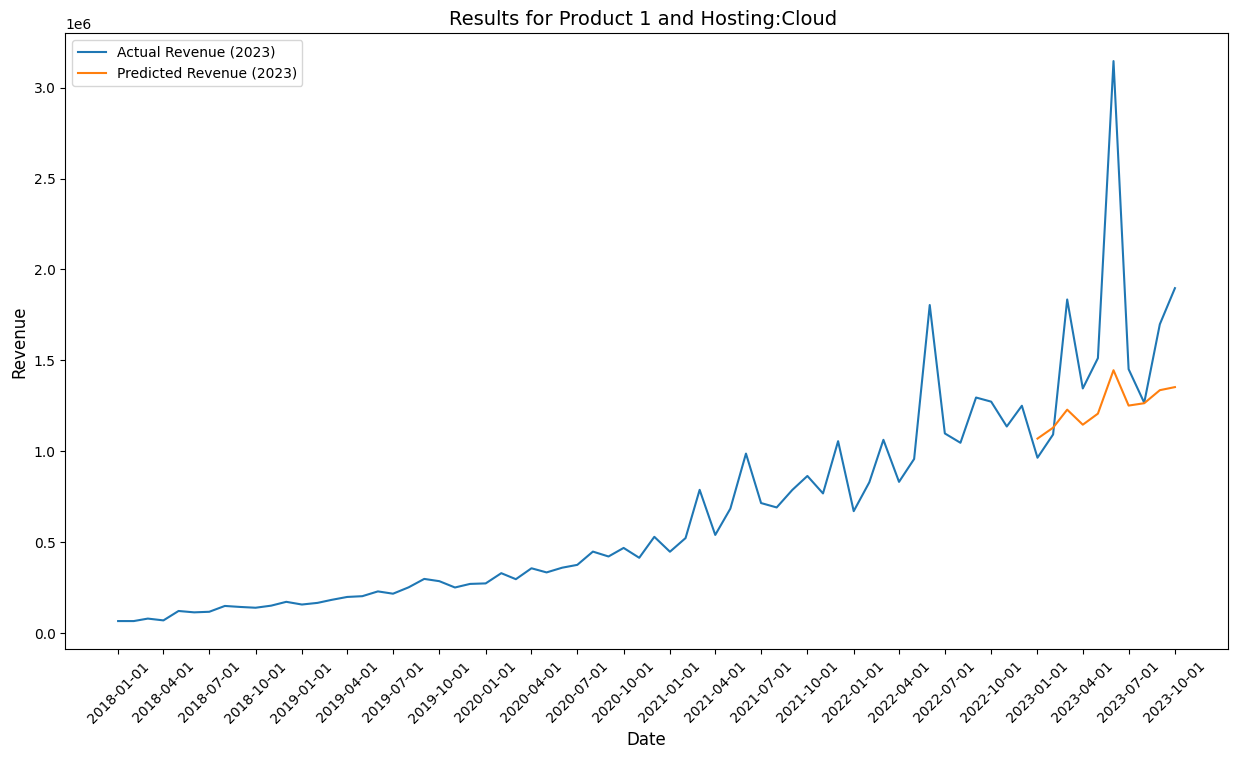

In [88]:
filtered_2_df = df[

    (df['hosting'] == 'Cloud') &
    (df['product_id'] == 'Product 1')
]
# Train
train_data_2 = filtered_2_df[(filtered_2_df['year'] >= 2018) & (filtered_2_df['year'] <= 2022)]
filtered_2_df = filtered_2_df.sort_values('sale_date')
model.fit(train_data_2[features], train_data_2[target])

# predictions for 2023
df_2023 = filtered_2_df[filtered_2_df['year'] == 2023]
df_2023['predicted_revenue'] = model.predict(df_2023[features])
df_2023 = df_2023.sort_values('sale_date')

# Create a DataFrame for the predictions
predictions_actuals_diff_2023 = pd.DataFrame({
    'Date': df_2023['sale_date'],
    'Actual Revenue': df_2023['revenue'],
    'Predicted Revenue': df_2023['predicted_revenue'],
    'Difference': df_2023['revenue'] - df_2023['predicted_revenue']
})


# Evaluate the model on 2023 data
#mae_2023 = mean_absolute_error(df_2023[target], df_2023['predicted_revenue'])
#print(f'Mean Absolute Error for 2023: {mae_2023}')
#mse_2023 = mean_squared_error(df_2023[target], df_2023['predicted_revenue'])
#print(f'Mean Squared Error for 2023: {mse_2023}')
mape_2023 = mean_absolute_percentage_error(df_2023['revenue'], df_2023['predicted_revenue'])*100
print(f'Mean Absolute % Error for 2023: {mape_2023}')


# Plot the aggregated monthly actual and predicted revenue
plt.figure(figsize=(15, 8))
plt.plot(filtered_2_df['sale_date'], filtered_2_df['revenue'], label='Actual Revenue (2023)', linestyle='-')
plt.plot(df_2023['sale_date'], df_2023['predicted_revenue'], label='Predicted Revenue (2023)', linestyle='-')
#plt.suptitle('Actual vs predicted revenue(with One-Hot Encoding)')
plt.title('Results for Product 1 and Hosting:Cloud ', fontsize=14)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.xticks(rotation=45)
ticks = filtered_2_df['sale_date'][::3]
plt.xticks(ticks)
plt.legend()
#plt.grid(True)
plt.show()

Linear regression predictions using One-hot encoding and the difference in revenue

Mean Absolute Error for 2023: 2400998.6013729624
Mean Squared Error for 2023: 7701479663864.094
Mean Absolute % Error for 2023: 1.4391236053832565e+20


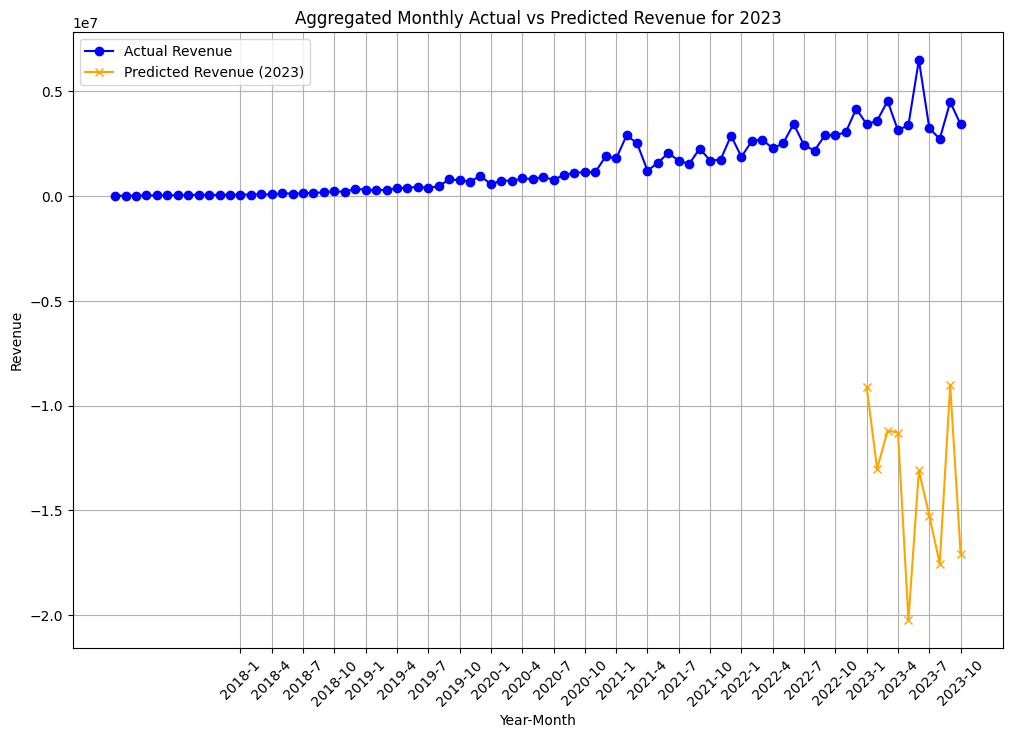

In [ ]:
# Calculate revenue differences
df['revenue_diff'] = df['revenue'].diff()
df = df.dropna(subset=['revenue_diff'])

# Define features and target
features = ['year', 'month']
target = 'revenue_diff'

# Train
train_data = df[(df['year'] >= 2018) & (df['year'] <= 2022)]

preprocessor = ColumnTransformer(
    transformers=[('month', OneHotEncoder(), ['month'])],
    remainder='passthrough'
)

# Model training using a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(train_data[features], train_data[target])

# Make predictions for 2023
df_2023 = df[df['year'] == 2023]
df_2023['predicted_revenue_diff'] = np.expm1(model.predict(df_2023[features]))

# Integrate the forecasted differences to get forecasted revenue
df_2023['predicted_revenue'] = df_2023['revenue'].iloc[0] + df_2023['predicted_revenue_diff'].cumsum()


predictions_actuals_diff_2023 = pd.DataFrame({
    'Date': df_2023['sale_date'],
    'Actual Revenue': df_2023['revenue'],
    'Predicted Revenue': df_2023['predicted_revenue'],
    'Difference': df_2023['revenue'] - df_2023['predicted_revenue']
})



# Evaluate
mae_2023 = mean_absolute_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Absolute Error for 2023: {mae_2023}')
mse_2023 = mean_squared_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Squared Error for 2023: {mse_2023}')
mape_2023 = mean_absolute_percentage_error(df_2023[target], df_2023['predicted_revenue'])
print(f'Mean Absolute % Error for 2023: {mape_2023}')

# Plot the aggregated monthly actual and predicted revenue for 2023
monthly_agg_actual = df.groupby(['year', 'month'])[['revenue']].sum().reset_index()
monthly_agg_predicted = df_2023.groupby(['year', 'month'])[['predicted_revenue']].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(monthly_agg_actual['year'].astype(str) + '-' + monthly_agg_actual['month'].astype(str), monthly_agg_actual['revenue'], label='Actual Revenue ', marker='o', linestyle='-', color='blue')
plt.plot(monthly_agg_predicted['year'].astype(str) + '-' + monthly_agg_predicted['month'].astype(str), monthly_agg_predicted['predicted_revenue'], label='Predicted Revenue (2023)', marker='x', linestyle='-', color='orange')

plt.title('Aggregated Monthly Actual vs Predicted Revenue for 2023')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
ticks = monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['year'].astype(str) + '-' + monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['month'].astype(str)
plt.xticks(ticks[::3])
plt.legend()
plt.grid(True)
plt.show()

filtering the differnece by hosting

Mean Absolute Error for 2023: 708976.9041671038
Mean Squared Error for 2023: 876713166202.8402
Mean Absolute % Error for 2023: 2.9312331337346077e+19


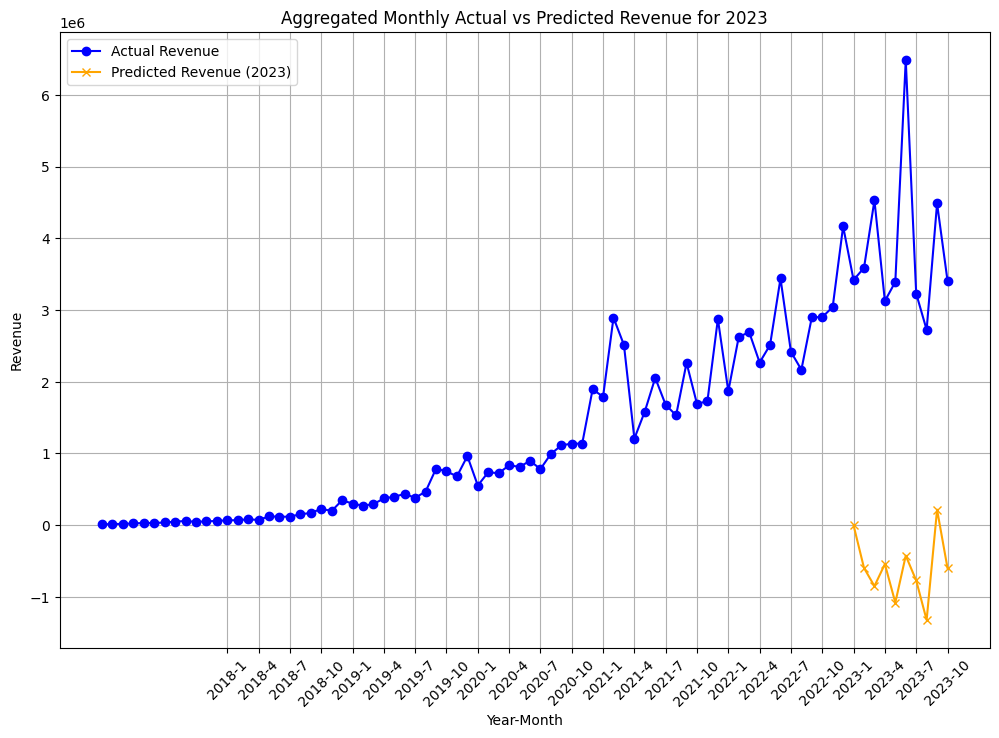

In [ ]:
# Filter the data by hosting type
filtered_df = df[df['hosting'] == 'Data Center']

# Calculate revenue differences
filtered_df['revenue_diff'] = filtered_df['revenue'].diff()
filtered_df = filtered_df.dropna(subset=['revenue_diff'])

# Define features and target
features = ['year', 'month']
target = 'revenue_diff'

# Train
train_data = filtered_df[(filtered_df['year'] >= 2018) & (filtered_df['year'] <= 2022)]

# One-hot encoding for the 'month' feature
preprocessor = ColumnTransformer(
    transformers=[('month', OneHotEncoder(), ['month'])],
    remainder='passthrough'
)

# Model training using a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(train_data[features], train_data[target])

# Make predictions for 2023
df_2023 = filtered_df[df['year'] == 2023]
df_2023['predicted_revenue_diff'] = model.predict(df_2023[features])

# Integrate the forecasted differences to get forecasted revenue
df_2023['predicted_revenue'] = df_2023['revenue'].iloc[0] + df_2023['predicted_revenue_diff'].cumsum()

# Create new DataFrame
predictions_actuals_diff_2023 = pd.DataFrame({
    'Date': df_2023['sale_date'],
    'Actual Revenue': df_2023['revenue'],
    'Predicted Revenue': df_2023['predicted_revenue'],
    'Difference': df_2023['revenue'] - df_2023['predicted_revenue']
})

# Evaluate
mae_2023 = mean_absolute_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Absolute Error for 2023: {mae_2023}')
mse_2023 = mean_squared_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Squared Error for 2023: {mse_2023}')
mape_2023 = mean_absolute_percentage_error(df_2023[target], df_2023['predicted_revenue'])
print(f'Mean Absolute % Error for 2023: {mape_2023}')

# Plot
plt.figure(figsize=(12, 8))
plt.plot(filtered_2_df['sale_date'], filtered_2_df['revenue'], label='Actual Revenue (2023)', marker='o', linestyle='-', color='blue')
plt.plot(df_2023['sale_date'], df_2023['predicted_revenue'], label='Predicted Revenue (2023)', marker='x', linestyle='-', color='orange')
plt.suptitle('Actual vs predicted revenue(with One-Hot Encoding)')
plt.title('Calculations are done by product and hosting type ', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
ticks = filtered_2_df['sale_date'][::3]
plt.xticks(ticks)
plt.legend()
plt.grid(True)
plt.show()


Filtering by product and hosting

Mean Absolute Error for 2023: 2362197.4228117457
Mean Squared Error for 2023: 7968706318752.102
Mean Absolute % Error for 2023: 107.04777463729685


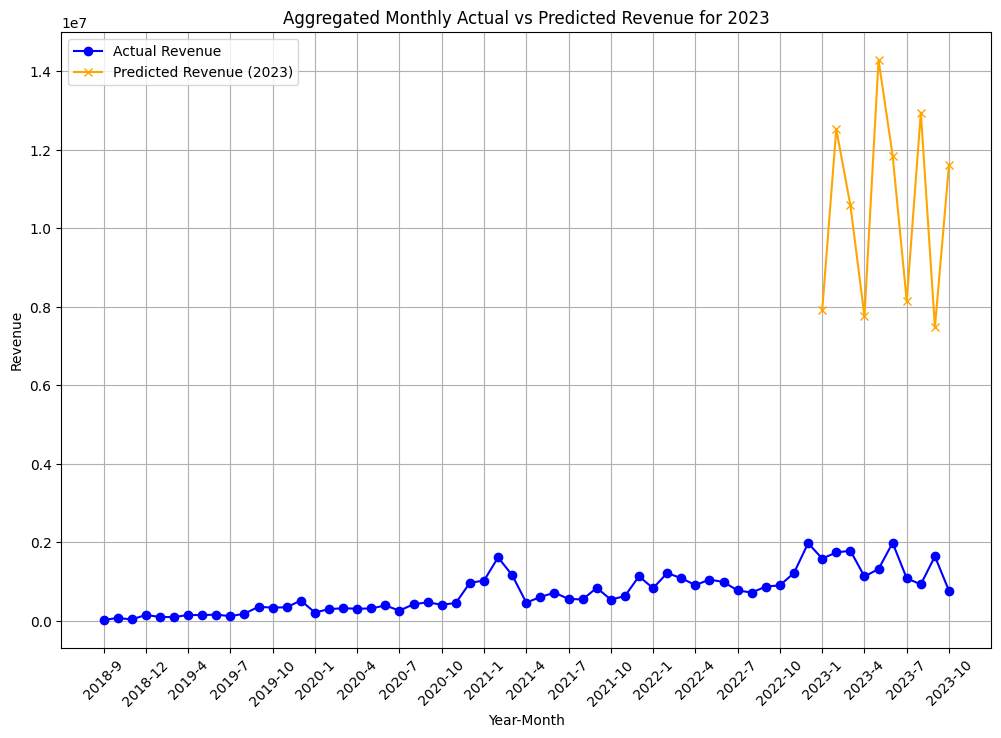

In [ ]:
# Filter the data by product and hosting type
filtered_2_df = df[

    (df['hosting'] == 'Data Center') &
    (df['product_id'] == 'Product 1')
]

filtered_2_df['revenue_diff'] = filtered_2_df['revenue'].diff()
filtered_2_df = filtered_2_df.dropna(subset=['revenue_diff'])


filtered_2_df = filtered_2_df.sort_values('sale_date')

features = ['year', 'month']
target = 'revenue_diff'

train_data = filtered_2_df[(filtered_2_df['year'] >= 2018) & (filtered_2_df['year'] <= 2022)]

preprocessor = ColumnTransformer(
    transformers=[('month', OneHotEncoder(), ['month'])],
    remainder='passthrough'
)

# Train
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(train_data[features], train_data[target])

# predictions for 2023
df_2023 = filtered_df[df['year'] == 2023]
df_2023['predicted_revenue_diff'] = model.predict(df_2023[features])


df_2023['predicted_revenue'] = df_2023['revenue'].iloc[0] + df_2023['predicted_revenue_diff'].cumsum()
df_2023 = df_2023.sort_values('sale_date')

# Create a DataFrame for the predictions
predictions_actuals_diff_2023 = pd.DataFrame({
    'Date': df_2023['sale_date'],
    'Actual Revenue': df_2023['revenue'],
    'Predicted Revenue': df_2023['predicted_revenue'],
    'Difference': df_2023['revenue'] - df_2023['predicted_revenue']
})

# Evaluate
mae_2023 = mean_absolute_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Absolute Error for 2023: {mae_2023}')
mse_2023 = mean_squared_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Squared Error for 2023: {mse_2023}')
mape_2023 = mean_absolute_percentage_error(df_2023['revenue'], df_2023['predicted_revenue'])
print(f'Mean Absolute % Error for 2023: {mape_2023}')

# Plot
monthly_agg_actual = filtered_2_df.groupby(['year', 'month'])[['revenue']].sum().reset_index()
monthly_agg_predicted = df_2023.groupby(['year', 'month'])[['predicted_revenue']].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(monthly_agg_actual['year'].astype(str) + '-' + monthly_agg_actual['month'].astype(str), monthly_agg_actual['revenue'], label='Actual Revenue ', marker='o', linestyle='-', color='blue')
plt.plot(monthly_agg_predicted['year'].astype(str) + '-' + monthly_agg_predicted['month'].astype(str), monthly_agg_predicted['predicted_revenue'], label='Predicted Revenue (2023)', marker='x', linestyle='-', color='orange')

plt.title('Aggregated Monthly Actual vs Predicted Revenue for 2023')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
ticks = monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['year'].astype(str) + '-' + monthly_agg_actual[(monthly_agg_actual['year'] >= 2018)]['month'].astype(str)
plt.xticks(ticks[::3])
plt.legend()
plt.grid(True)
plt.show()


Predictions done using Kalman filters

In [15]:
pip install pykalman


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48442 sha256=4f817049522802a93ac00e2178f85897aa1bcca355bb2528b418e5e5bc91c613
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [16]:
from google.colab import files

uploaded = files.upload()

Saving forecasting.csv to forecasting (1).csv


In [17]:
uploaded.keys()

dict_keys(['forecasting (1).csv'])

In [81]:
df = pd.read_csv('forecasting (1).csv')
df.head()

,product_id,hosting,sale_date,revenue
0,Product 1,Cloud,2023-11-01,53583.85
1,Product 5,Cloud,2023-09-01,213436.30
2,Product 5,Cloud,2023-08-01,80083.97
3,Product 5,Data Center,2023-07-01,367722.25
4,Product 5,Cloud,2023-01-01,58483.99


In [82]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df= df[(df['sale_date'] >= '2017-12-31')& (df['sale_date'] <= '2023-10-31')]


df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month

Training all the data

In [83]:
from pykalman import KalmanFilter


Mean Absolute Error (MAE): 471010.5465170832

Mean Absolute % Error (MAE): 9.34675424884791


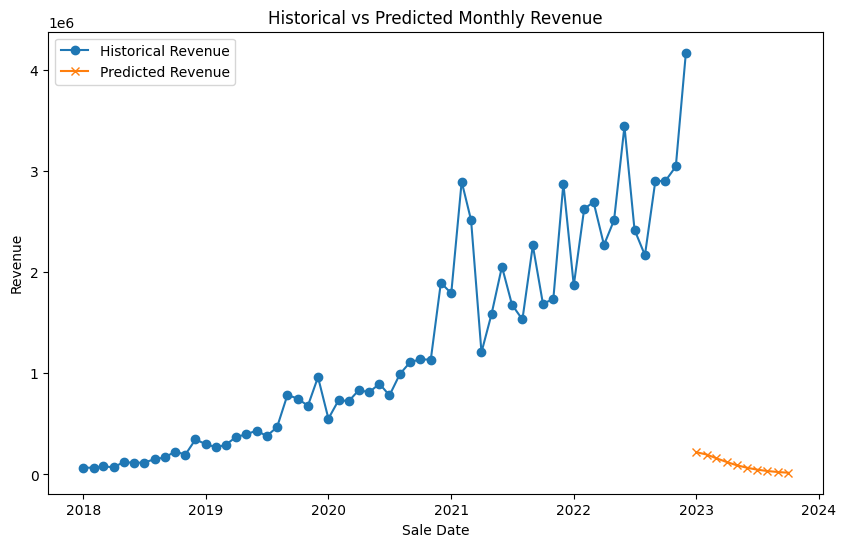

In [ ]:

kalman_data_all = df[
    (df['year'] >= 2018) & (df['year'] <= 2022)]

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kf = kf.em(kalman_data_all['revenue'].values, n_iter=10)

num_months_to_predict = 10
filtered_state_means, _ = kf.filter(np.zeros(num_months_to_predict))

# Create a DataFrame for the predictions
future_dates = pd.date_range(start=kalman_data_all['sale_date'].max() + pd.DateOffset(months=1), periods=num_months_to_predict, freq='MS')
future_predictions_df = pd.DataFrame({
    'sale_date': future_dates,
    'month': future_dates.month,
    'predicted_revenue': filtered_state_means.flatten()
})

actual_revenue = df[
        (df['year'] == 2023)]

monthly_aggregation_actual = actual_revenue.groupby(['month'])[['revenue']].sum().reset_index()
merged_df = pd.merge(future_predictions_df, actual_revenue, on='month', how='left', suffixes=('_predicted', '_actual'))

merged_df['revenue_difference'] = merged_df['predicted_revenue'] - merged_df['revenue']
mae = abs(merged_df['revenue_difference']).mean()
mape = mean_absolute_percentage_error(merged_df['revenue'], merged_df['predicted_revenue'])

# Plot
print("\nMean Absolute Error (MAE):", mae)
print("\nMean Absolute % Error (MAE):", mape)
monthly_aggregation =  kalman_data_all.groupby(['year', 'month', 'sale_date'])[['revenue']].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregation['sale_date'], monthly_aggregation['revenue'], label='Historical Revenue', marker='o')
plt.plot(future_predictions_df['sale_date'], future_predictions_df['predicted_revenue'], label='Predicted Revenue', marker='x')
plt.title('Historical vs Predicted Monthly Revenue')
plt.xlabel('Sale Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Kalman filter, by filtering the data by hosting


Mean Absolute Error (MAE): 477653.84316347295

Mean Absolute % Error (MAE): 9.895222285063744


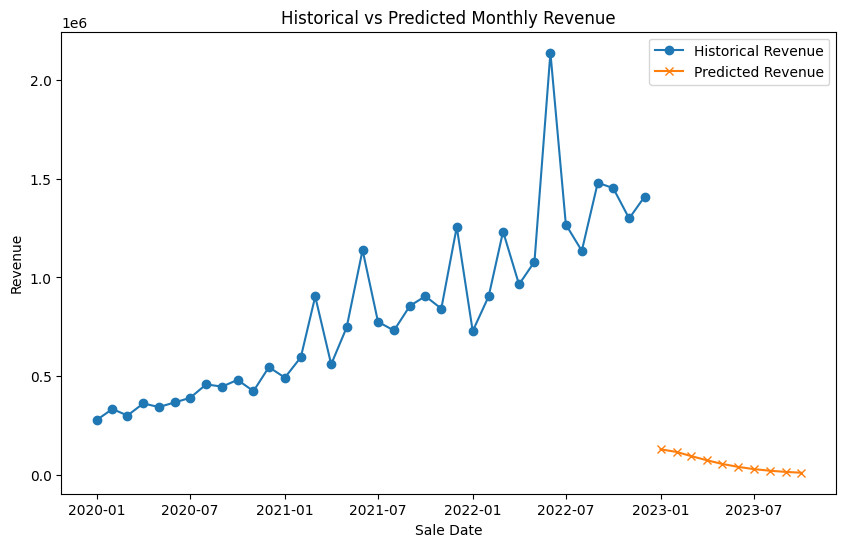

In [ ]:
kalman_data_hosting = df[
    (df['year'] >= 2020) & (df['year'] <= 2022)&
    (df['hosting'] == 'Cloud')]

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kf = kf.em(kalman_data_hosting['revenue'].values, n_iter=10)

num_months_to_predict = 10
filtered_state_means, _ = kf.filter(np.zeros(num_months_to_predict))

# Create a DataFrame for the predictions
future_dates = pd.date_range(start=kalman_data_hosting['sale_date'].max() + pd.DateOffset(months=1), periods=num_months_to_predict, freq='MS')
future_predictions_df = pd.DataFrame({
    'sale_date': future_dates,
    'month': future_dates.month,
    'predicted_revenue': filtered_state_means.flatten()
})

actual_revenue = df[
        (df['year'] == 2023)&
        (df['hosting'] == 'Cloud')]

monthly_aggregation_actual = actual_revenue.groupby(['month'])[['revenue']].sum().reset_index()
merged_df = pd.merge(future_predictions_df, actual_revenue, on='month', how='left', suffixes=('_predicted', '_actual'))
merged_df['revenue_difference'] = merged_df['predicted_revenue'] - merged_df['revenue']
mae = abs(merged_df['revenue_difference']).mean()
mape = mean_absolute_percentage_error(merged_df['revenue'], merged_df['predicted_revenue'])

# Plot
print("\nMean Absolute Error (MAE):", mae)
print("\nMean Absolute % Error (MAE):", mape)
monthly_aggregation =  kalman_data_hosting.groupby(['year', 'month', 'sale_date'])[['revenue']].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregation['sale_date'], monthly_aggregation['revenue'], label='Historical Revenue', marker='o')
plt.plot(future_predictions_df['sale_date'], future_predictions_df['predicted_revenue'], label='Predicted Revenue', marker='x')
plt.title('Historical vs Predicted Monthly Revenue')
plt.xlabel('Sale Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Kalman filter, by product and hosting

Mean Absolute Percentage Error (MAPE): 99.80%

Mean Absolute Error (MAE): 1390824.078073041

Mean Absolute % Error (MAE): 99.80026522720621


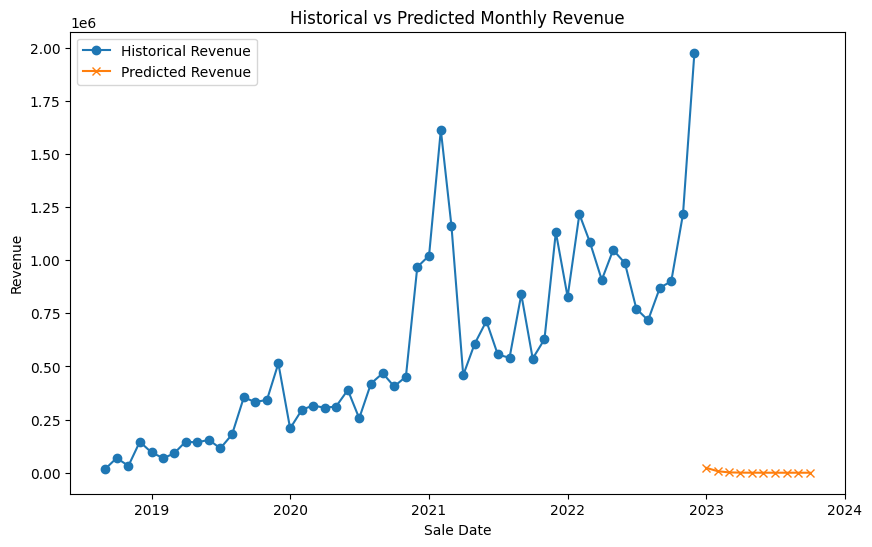

In [ ]:
kalman_data_f = df[
    (df['year'] >= 2018) & (df['year'] <= 2022)&
    (df['hosting'] == 'Data Center') &
    (df['product_id'] == 'Product 1')]
kalman_data_f = kalman_data_f.sort_values('sale_date')

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kf = kf.em(kalman_data_f['revenue'].values, n_iter=10)

num_months_to_predict = 10
filtered_state_means, _ = kf.filter(np.zeros(num_months_to_predict))

future_dates = pd.date_range(start=kalman_data_f['sale_date'].max() + pd.DateOffset(months=1), periods=num_months_to_predict, freq='MS')
future_predictions_df = pd.DataFrame({
    'sale_date': future_dates,
    'month': future_dates.month,
    'predicted_revenue': filtered_state_means.flatten()
})

actual_revenue = df[
        (df['year'] == 2023)&
        (df['hosting'] == 'Data Center')&
        (df['product_id'] == 'Product 1')]

actual_revenue = actual_revenue.sort_values(by='month')
monthly_aggregation_actual = actual_revenue.groupby(['month'])[['revenue']].sum().reset_index()
merged_df = pd.merge(future_predictions_df, actual_revenue, on='month', how='left', suffixes=('_predicted', '_actual'))
merged_df['revenue_difference'] = merged_df['predicted_revenue'] - merged_df['revenue']
merged_df.dropna(subset=['revenue_difference'], inplace=True)
mae = abs(merged_df['revenue_difference']).mean()
mape = mean_absolute_percentage_error(merged_df['revenue'], merged_df['predicted_revenue']) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Plot
print("\nMean Absolute Error (MAE):", mae)
print("\nMean Absolute % Error (MAE):", mape)
plt.figure(figsize=(10, 6))
plt.plot(kalman_data_f['sale_date'], kalman_data_f['revenue'], label='Historical Revenue', marker='o')
plt.plot(future_predictions_df['sale_date'], future_predictions_df['predicted_revenue'], label='Predicted Revenue', marker='x')
plt.title('Historical vs Predicted Monthly Revenue')
plt.xlabel('Sale Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Using paramaters for Kalman filter and all the data set


Mean Absolute Error (MAE): 450066.7338419245

Mean Absolute % Error (MAE): 2.5259066592032458


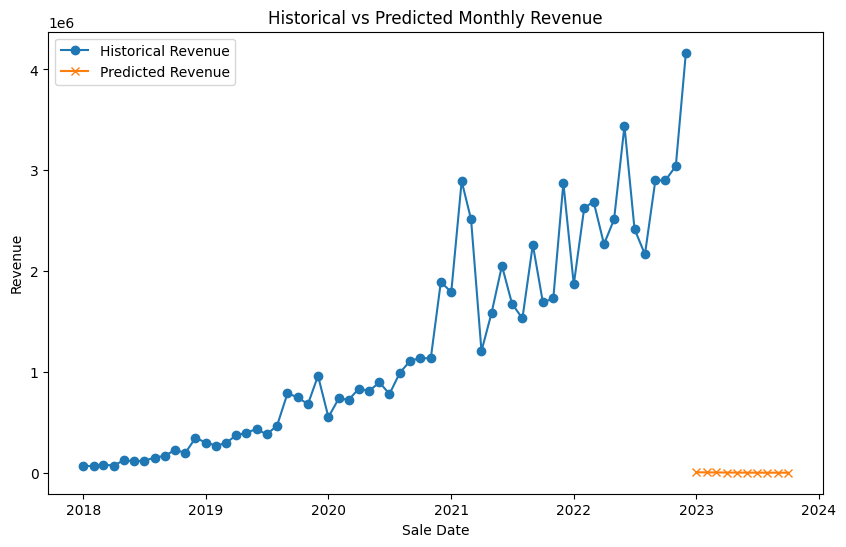

In [ ]:
# Train the Kalman filter on historical data with different parameters
kf_params = {
    'initial_state_mean': [1.1]  ,
    'transition_matrices': [1.1],
    'observation_matrices': [1.1]
}

kf_p = KalmanFilter(**kf_params)
kf_data = kf_p.em(kalman_data_all['revenue'].values, n_iter=10)

num_months_to_predict = 5
filtered_state_means_1, _ = kf_data.filter(np.zeros(num_months_to_predict))
future_dates_param = pd.date_range(start=kalman_data_all['sale_date'].max() + pd.DateOffset(months=1), periods=num_months_to_predict, freq='MS')
future_predictions_param = pd.DataFrame({
    'sale_date': future_dates_param,
    'month': future_dates_param.month,
    'predicted_revenue': filtered_state_means_1.flatten()
})

actual_revenue = df[
        (df['year'] == 2023)]

monthly_aggregation_actual = actual_revenue.groupby(['month'])[['revenue']].sum().reset_index()
merged_df = pd.merge(future_predictions_param, actual_revenue, on='month', how='left', suffixes=('_predicted', '_actual'))
merged_df['revenue_difference'] = merged_df['predicted_revenue'] - merged_df['revenue']
mae = abs(merged_df['revenue_difference']).mean()
mape = mean_absolute_percentage_error(merged_df['revenue'], merged_df['predicted_revenue'])

# Plot
print("\nMean Absolute Error (MAE):", mae)
print("\nMean Absolute % Error (MAE):", mape)
monthly_aggregation =  kalman_data_all.groupby(['year', 'month', 'sale_date'])[['revenue']].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregation['sale_date'], monthly_aggregation['revenue'], label='Historical Revenue', marker='o')
plt.plot(future_predictions_df['sale_date'], future_predictions_df['predicted_revenue'], label='Predicted Revenue', marker='x')
plt.title('Historical vs Predicted Monthly Revenue')
plt.xlabel('Sale Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Kalman filter using paramaters and filtering by hosting


Mean Absolute Error (MAE): 404033.62158670754

Mean Absolute % Error (MAE): 1.3729349575864842


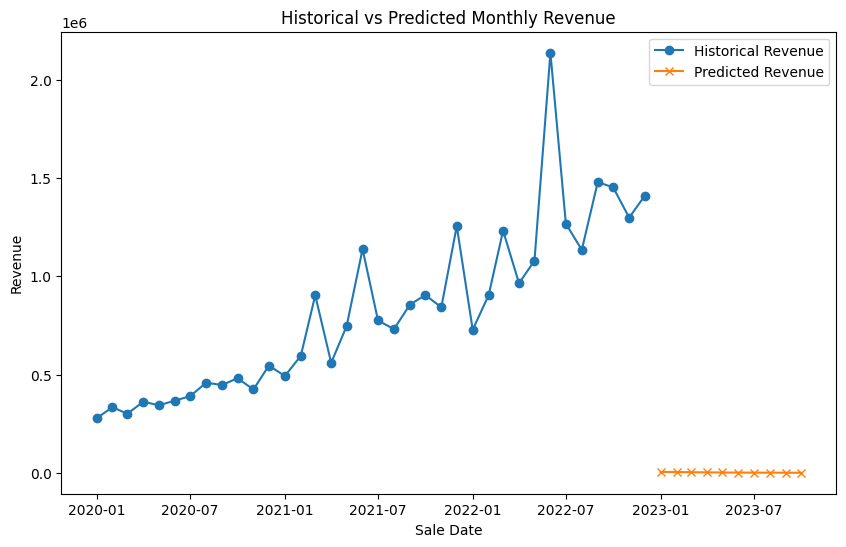

In [ ]:
# Train
kf_params = {
    'initial_state_mean': [1.1]  ,
    'transition_matrices': [1.1],
    'observation_matrices': [1.1],
}

kf_p = KalmanFilter(**kf_params)
kf_data = kf_p.em(kalman_data_hosting['revenue'].values, n_iter=10)


num_months_to_predict = 5
filtered_state_means_1, _ = kf_data.filter(np.zeros(num_months_to_predict))

# Create a DataFrame for the predictions
future_dates_param = pd.date_range(start=kalman_data_hosting['sale_date'].max() + pd.DateOffset(months=1), periods=num_months_to_predict, freq='MS')
future_predictions_param = pd.DataFrame({
    'sale_date': future_dates_param,
    'month': future_dates_param.month,
    'predicted_revenue': filtered_state_means_1.flatten()
})

actual_revenue = df[
        (df['year'] == 2023)&
        (df['hosting'] == 'Cloud')]

monthly_aggregation_actual = actual_revenue.groupby(['month'])[['revenue']].sum().reset_index()
merged_df = pd.merge(future_predictions_param, actual_revenue, on='month', how='left', suffixes=('_predicted', '_actual'))
merged_df['revenue_difference'] = merged_df['predicted_revenue'] - merged_df['revenue']
mae = abs(merged_df['revenue_difference']).mean()
mape = mean_absolute_percentage_error(merged_df['revenue'], merged_df['predicted_revenue'])

# Plot
print("\nMean Absolute Error (MAE):", mae)
print("\nMean Absolute % Error (MAE):", mape)
monthly_aggregation =  kalman_data_hosting.groupby(['year', 'month', 'sale_date'])[['revenue']].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregation['sale_date'], monthly_aggregation['revenue'], label='Historical Revenue', marker='o')
plt.plot(future_predictions_df['sale_date'], future_predictions_df['predicted_revenue'], label='Predicted Revenue', marker='x')
plt.title('Historical vs Predicted Monthly Revenue')
plt.xlabel('Sale Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Using the difference in revenue to predict revenue , filtered by hosting and product

Mean Absolute Percentage Error (MAPE): 23.61%


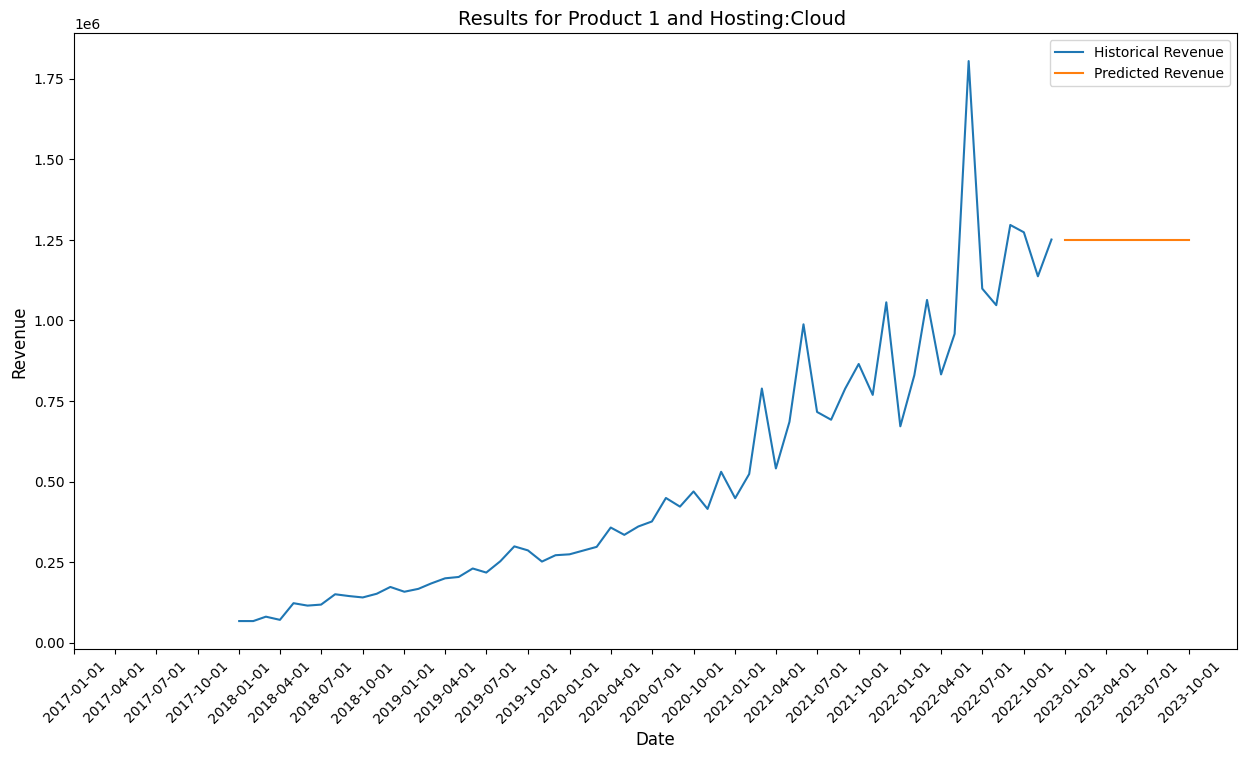

In [84]:
kalman_data_f = df[
    (df['year'] >= 2018) & (df['year'] <= 2022)&
    (df['hosting'] == 'Cloud') &
    (df['product_id'] == 'Product 1')]
kalman_data_f['revenue_diff'] = kalman_data_f['revenue'].diff()
kalman_data_f = kalman_data_f.dropna(subset=['revenue_diff'])
max_diff = np.max(np.abs(kalman_data_f['revenue_diff']))
kalman_data_f['revenue_diff_normalized'] = kalman_data_f['revenue_diff'] / max_diff
kalman_data_f = kalman_data_f.sort_values('sale_date')

actual_revenue = df[
        (df['year'] == 2023)&
        (df['hosting'] == 'Cloud')&
        (df['product_id'] == 'Product 1')]

kf_diff = KalmanFilter()
kf_diff = kf_diff.em(kalman_data_f['revenue_diff_normalized'].values, n_iter=10)
num_periods_to_predict = len(actual_revenue)
filtered_state_means, _ = kf_diff.filter(np.zeros(num_periods_to_predict))

forecasted_revenue = kalman_data_f['revenue'].iloc[-1] + filtered_state_means.cumsum()

# Create a DataFrame for the predictions
future_dates = pd.date_range(start=kalman_data_f['sale_date'].max() + pd.DateOffset(months=1), periods=num_periods_to_predict, freq='MS')
future_predictions_df = pd.DataFrame({
    'sale_date': future_dates,
    'month': future_dates.month,
    'predicted_revenue': forecasted_revenue
})

# Calculate the MAPE
mape = mean_absolute_percentage_error(actual_revenue['revenue'], future_predictions_df['predicted_revenue'])*100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.figure(figsize=(15, 8))
plt.plot(kalman_data_f['sale_date'], kalman_data_f['revenue'], label='Historical Revenue')
plt.plot(future_predictions_df['sale_date'], future_predictions_df['predicted_revenue'], label='Predicted Revenue')
plt.title('Results for Product 1 and Hosting:Cloud ', fontsize=14)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.xticks(rotation=45)
ticks = filtered_2_df['sale_date'][::3]
plt.xticks(ticks)

plt.legend()
plt.show()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: predicted_revenue, dtype: float64


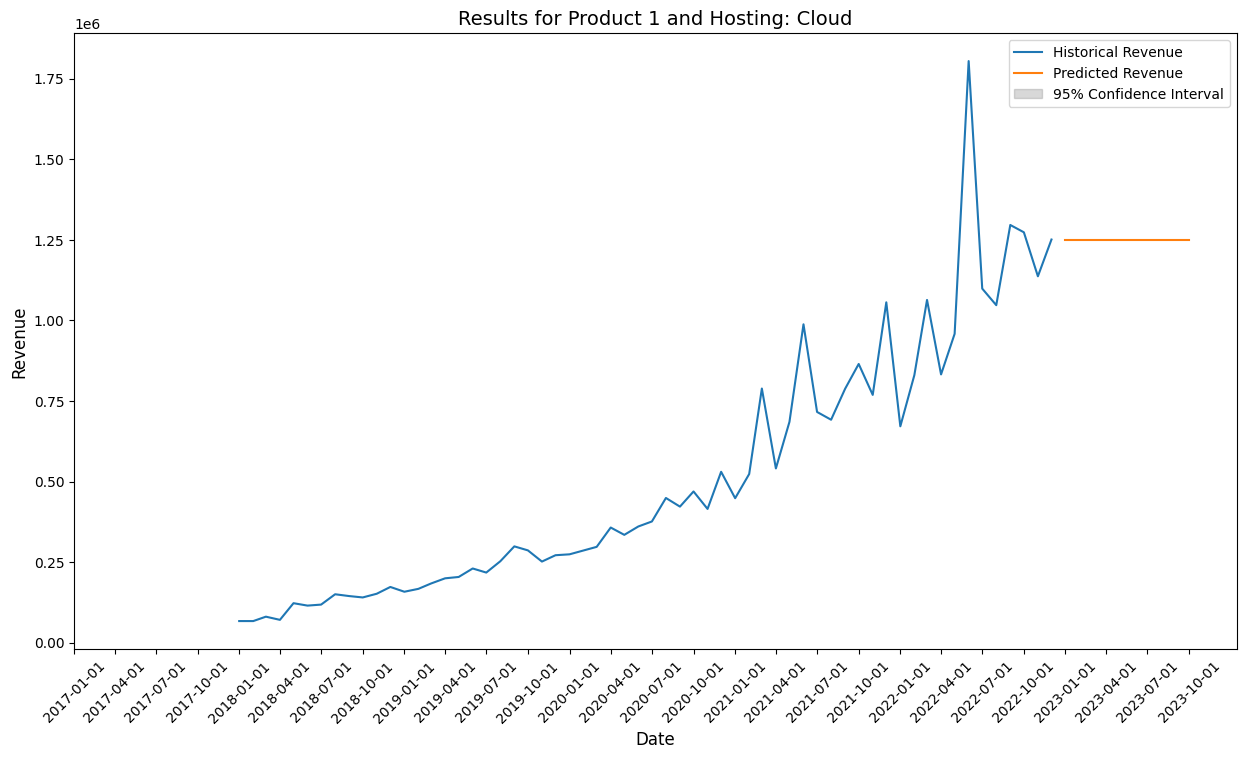

In [87]:
from scipy.stats import norm
#attempt  at confidence interval
confidence_level = 0.95  # You can adjust the confidence level
alpha = 1 - confidence_level

# standard error of the predictions
standard_error = np.std(future_predictions_df['predicted_revenue'] - actual_revenue['revenue'])

#  margin of error
margin_of_error = norm.ppf(1 - alpha / 2) * standard_error

# confidence intervals
lower_bound = future_predictions_df['predicted_revenue'] - margin_of_error
upper_bound = future_predictions_df['predicted_revenue'] + margin_of_error

# Include confidence intervals in your DataFrame
future_predictions_df['lower_bound'] = lower_bound
future_predictions_df['upper_bound'] = upper_bound
print(lower_bound)
plt.figure(figsize=(15, 8))
plt.plot(kalman_data_f['sale_date'], kalman_data_f['revenue'], label='Historical Revenue')
plt.plot(future_predictions_df['sale_date'], future_predictions_df['predicted_revenue'], label='Predicted Revenue')
plt.fill_between(future_predictions_df['sale_date'], future_predictions_df['lower_bound'], future_predictions_df['upper_bound'], color='gray', alpha=0.3, label='95% Confidence Interval')

plt.title('Results for Product 1 and Hosting: Cloud', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
ticks = filtered_2_df['sale_date'][::3]
plt.xticks(ticks)
plt.legend()
plt.show()

Sames as above, but for all the dataset( just for curiosity)

Mean Absolute Percentage Error (MAPE): 1642.63%


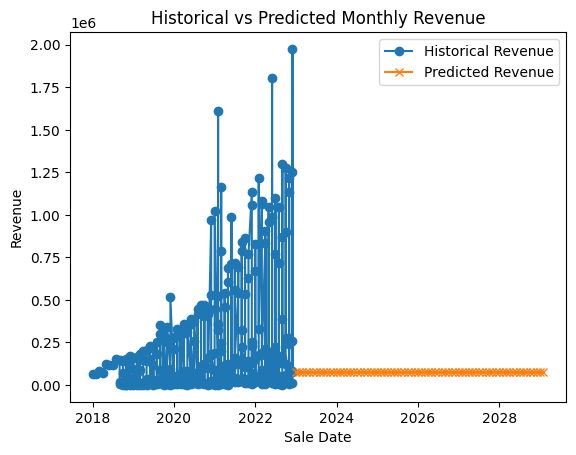

In [ ]:
kalman_data_f = df[
    (df['year'] >= 2018) & (df['year'] <= 2022)]
    #(df['hosting'] == 'Cloud') &
    #(df['product_id'] == 'Product 2')]
kalman_data_f['revenue_diff'] = kalman_data_f['revenue'].diff()
kalman_data_f = kalman_data_f.dropna(subset=['revenue_diff'])
max_diff = np.max(np.abs(kalman_data_f['revenue_diff']))
kalman_data_f['revenue_diff_normalized'] = kalman_data_f['revenue_diff'] / max_diff
kalman_data_f = kalman_data_f.sort_values('sale_date')

actual_revenue = df[
        (df['year'] == 2023)]
        #(df['hosting'] == 'Cloud')&
        #(df['product_id'] == 'Product 2')]

# Train the Kalman filter
kf_diff = KalmanFilter()
kf_diff = kf_diff.em(kalman_data_f['revenue_diff_normalized'].values, n_iter=10)

# Predict future revenue differences for the next periods
num_periods_to_predict = len(actual_revenue)
filtered_state_means, _ = kf_diff.filter(np.zeros(num_periods_to_predict))

# Integrate the forecasted differences to get forecasted revenue
forecasted_revenue = kalman_data_f['revenue'].iloc[-1] + filtered_state_means.cumsum()

# Create a DataFrame for the predictions
future_dates = pd.date_range(start=kalman_data_f['sale_date'].max() + pd.DateOffset(months=1), periods=num_periods_to_predict, freq='MS')
future_predictions_df = pd.DataFrame({
    'sale_date': future_dates,
    'month': future_dates.month,
    'predicted_revenue': forecasted_revenue
})

# Calculate the MAPE
mape = mean_absolute_percentage_error(actual_revenue['revenue'], future_predictions_df['predicted_revenue'])*100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.plot(kalman_data_f['sale_date'], kalman_data_f['revenue'], label='Historical Revenue', marker='o')
plt.plot(future_predictions_df['sale_date'], future_predictions_df['predicted_revenue'], label='Predicted Revenue', marker='x')
plt.title('Historical vs Predicted Monthly Revenue')
plt.xlabel('Sale Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()